# <center>EDA</center>
<div style="text-align:center">
    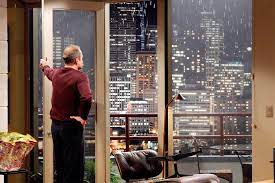
</div>

# Adapting the data set in DBEAVER

Using the following commands in DBeaver to get the data/merge tables:
```
SET SCHEMA 'eda';
SELECT k1.*, k2.date, k2.price
FROM king_county_house_details k1
INNER JOIN king_county_house_sales k2
ON k1.id = k2.house_id; 
```

The file is saved in data/king_county_house_details_sales.csv


# Libraries to import

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Library to visualize the missing the data
import missingno as msno

# Plot to identify poor neighborhoods
import altair as alt
import json
# Reprojecting geometrical data to adapt the coordinate system
import geopandas as gpd

# from vega_datasets import data as vega_data

import plotly.express as px
import plotly.graph_objects as go




# Import data set

Importing the merged data_set from a csv file. Which has already two joined tables to include price and it's date

In [4]:
df_kch = pd.read_csv('data/king_county_housing_details_a_sales.csv')

In [109]:
# Get info about the database: number of non null rows and data types
print(df_kch.info())
# Dimension of the dataset
print("Shape of the dataset:",np.shape(df_kch))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

Notes: 
- Waterfront, view, yr_renovated has some missing values
- Grade and Condition is in int
- Date is a string

In [8]:
# # Convert yr_renovated to int
# # Define a custom function to handle conversion
# def convert_yr_renovated(value):
#     if isinstance(value, (int, float)) and not np.isnan(value):
#         return int(value / 10)
#     return value

# # Apply the custom function to yr_renovated column
# df_kch['yr_renovated'] = df_kch['yr_renovated'].apply(convert_yr_renovated)

# # Display the data types of yr_renovated column
# unique_values = df_kch['yr_renovated'].unique()
# print(unique_values)
# print(df_kch['yr_renovated'][0].dtype)

[  0. 199.  nan 200. 201. 197. 198. 195. 194. 196. 193.]
float64


In [9]:
print(df_kch['yr_renovated'][0])
df_kch.head(5)

0.0


,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,199.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0


Converting the type of the date:

In [5]:
# converting the data type of date to date
df_kch['date'] = pd.to_datetime(df_kch['date'], format='%Y-%m-%d')

# Investigating simple statistics for columns & nan values & duplicates

In [11]:
# Basic statistics analysis of the columns:
print(df_kch.describe())

                 id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   4.580474e+09      3.373200      2.115826   2080.321850  1.509941e+04   
std    2.876736e+09      0.926299      0.768984    918.106125  4.141264e+04   
min    1.000102e+06      1.000000      0.500000    370.000000  5.200000e+02   
25%    2.123049e+09      3.000000      1.750000   1430.000000  5.040000e+03   
50%    3.904930e+09      3.000000      2.250000   1910.000000  7.618000e+03   
75%    7.308900e+09      4.000000      2.500000   2550.000000  1.068500e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21597.000000  19206.000000  21534.000000  21597.000000  21597.000000   
mean       1.494096      0.007602      0.233863      3.409825      7.657915   
std        0.539683      0.086858      0.765686    

Compared to Berlin: 
 - the sqft of living is 5 times 
 - waterfront, view, yr_renovated, sqft-basement show uncammon values for 25%,50%,min .... 

In [12]:
print("Unique values for the waterfront:",df_kch["waterfront"].unique())
print("Unique values for the year renovated:",df_kch["yr_renovated"].unique())
print("Unique values for the condition:",df_kch["condition"].min(),"-",df_kch["condition"].max())
print("Unique values for the grade:",df_kch["grade"].min(),"-",df_kch["grade"].max())

Unique values for the waterfront: [nan  0.  1.]
Unique values for the year renovated: [  0. 199.  nan 200. 201. 197. 198. 195. 194. 196. 193.]
Unique values for the condition: 1 - 5
Unique values for the grade: 3 - 13


<Axes: >

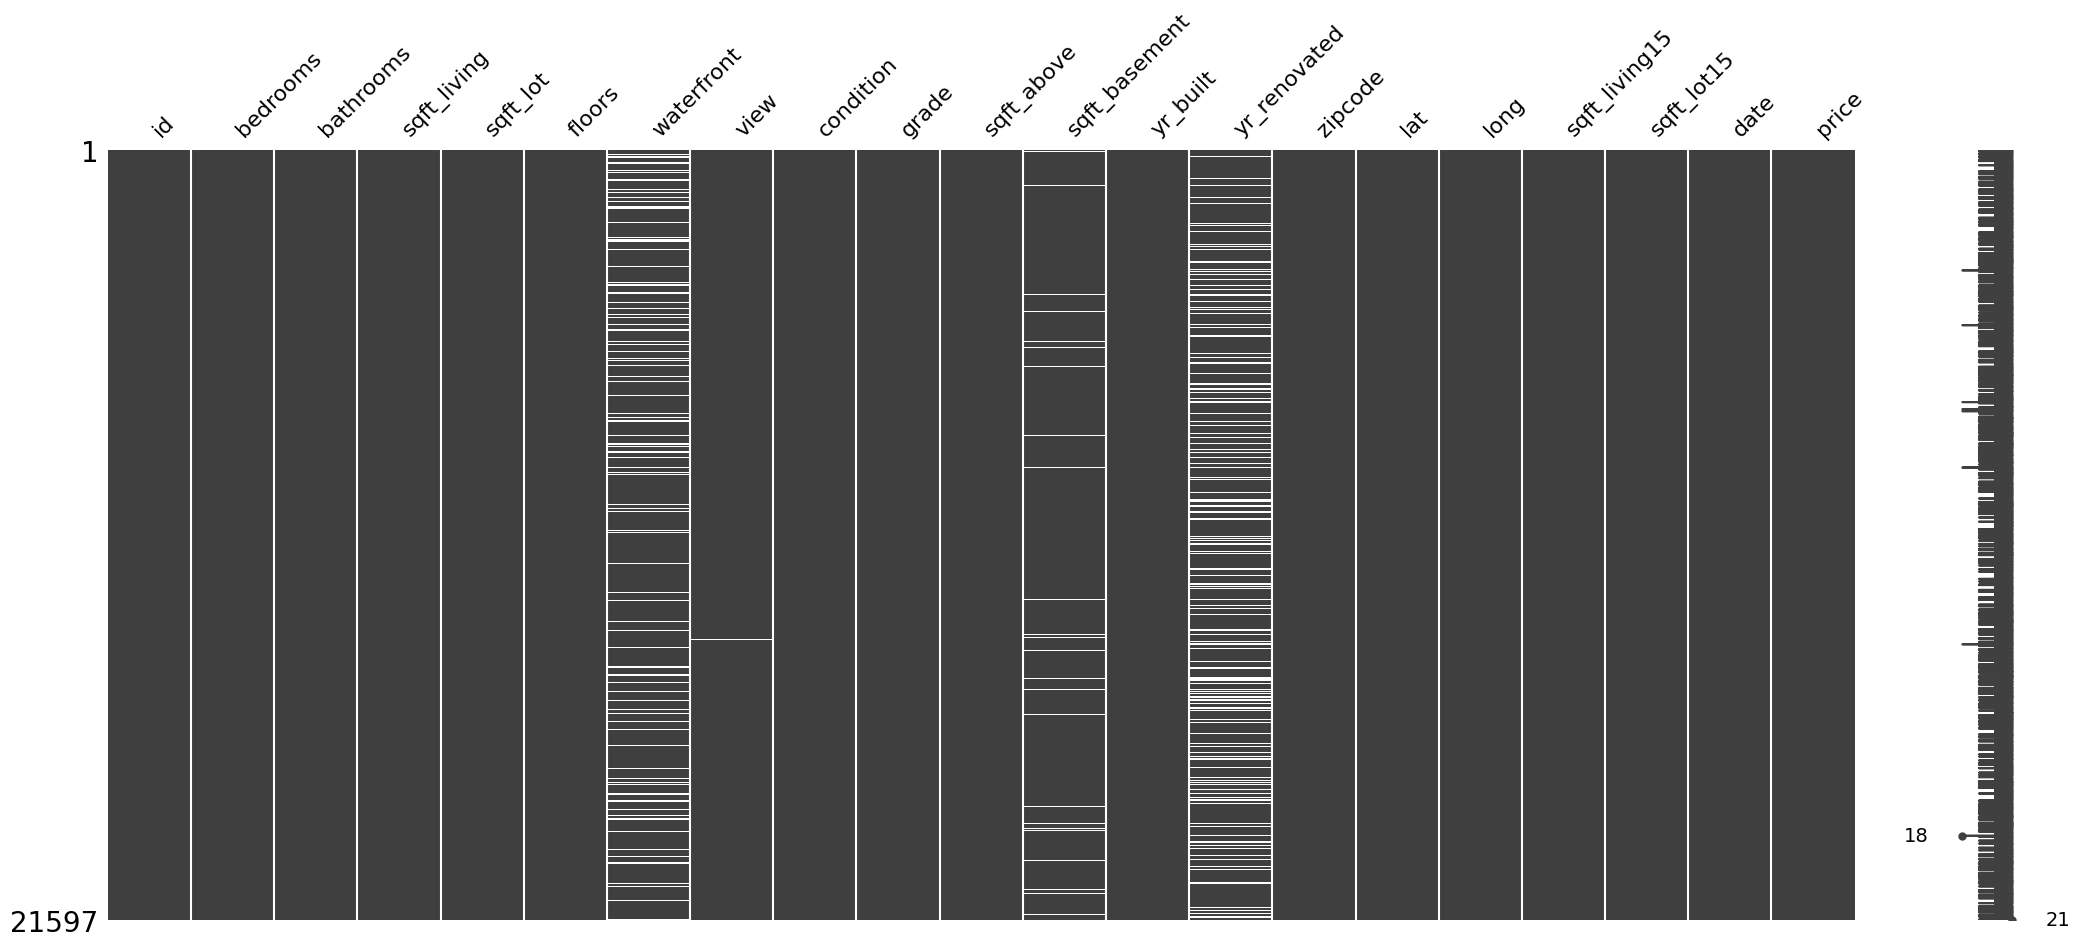

In [9]:
msno.matrix(df_kch)

Notes: waterfront,view, sqft_basement,yr_renovated has missing values

Basic statistical analysis of the columns:

In [13]:
# check how many duplicated rows exist in the data frame
df_kch.duplicated().value_counts()

False    21597
dtype: int64

In [14]:
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Investigating outliers

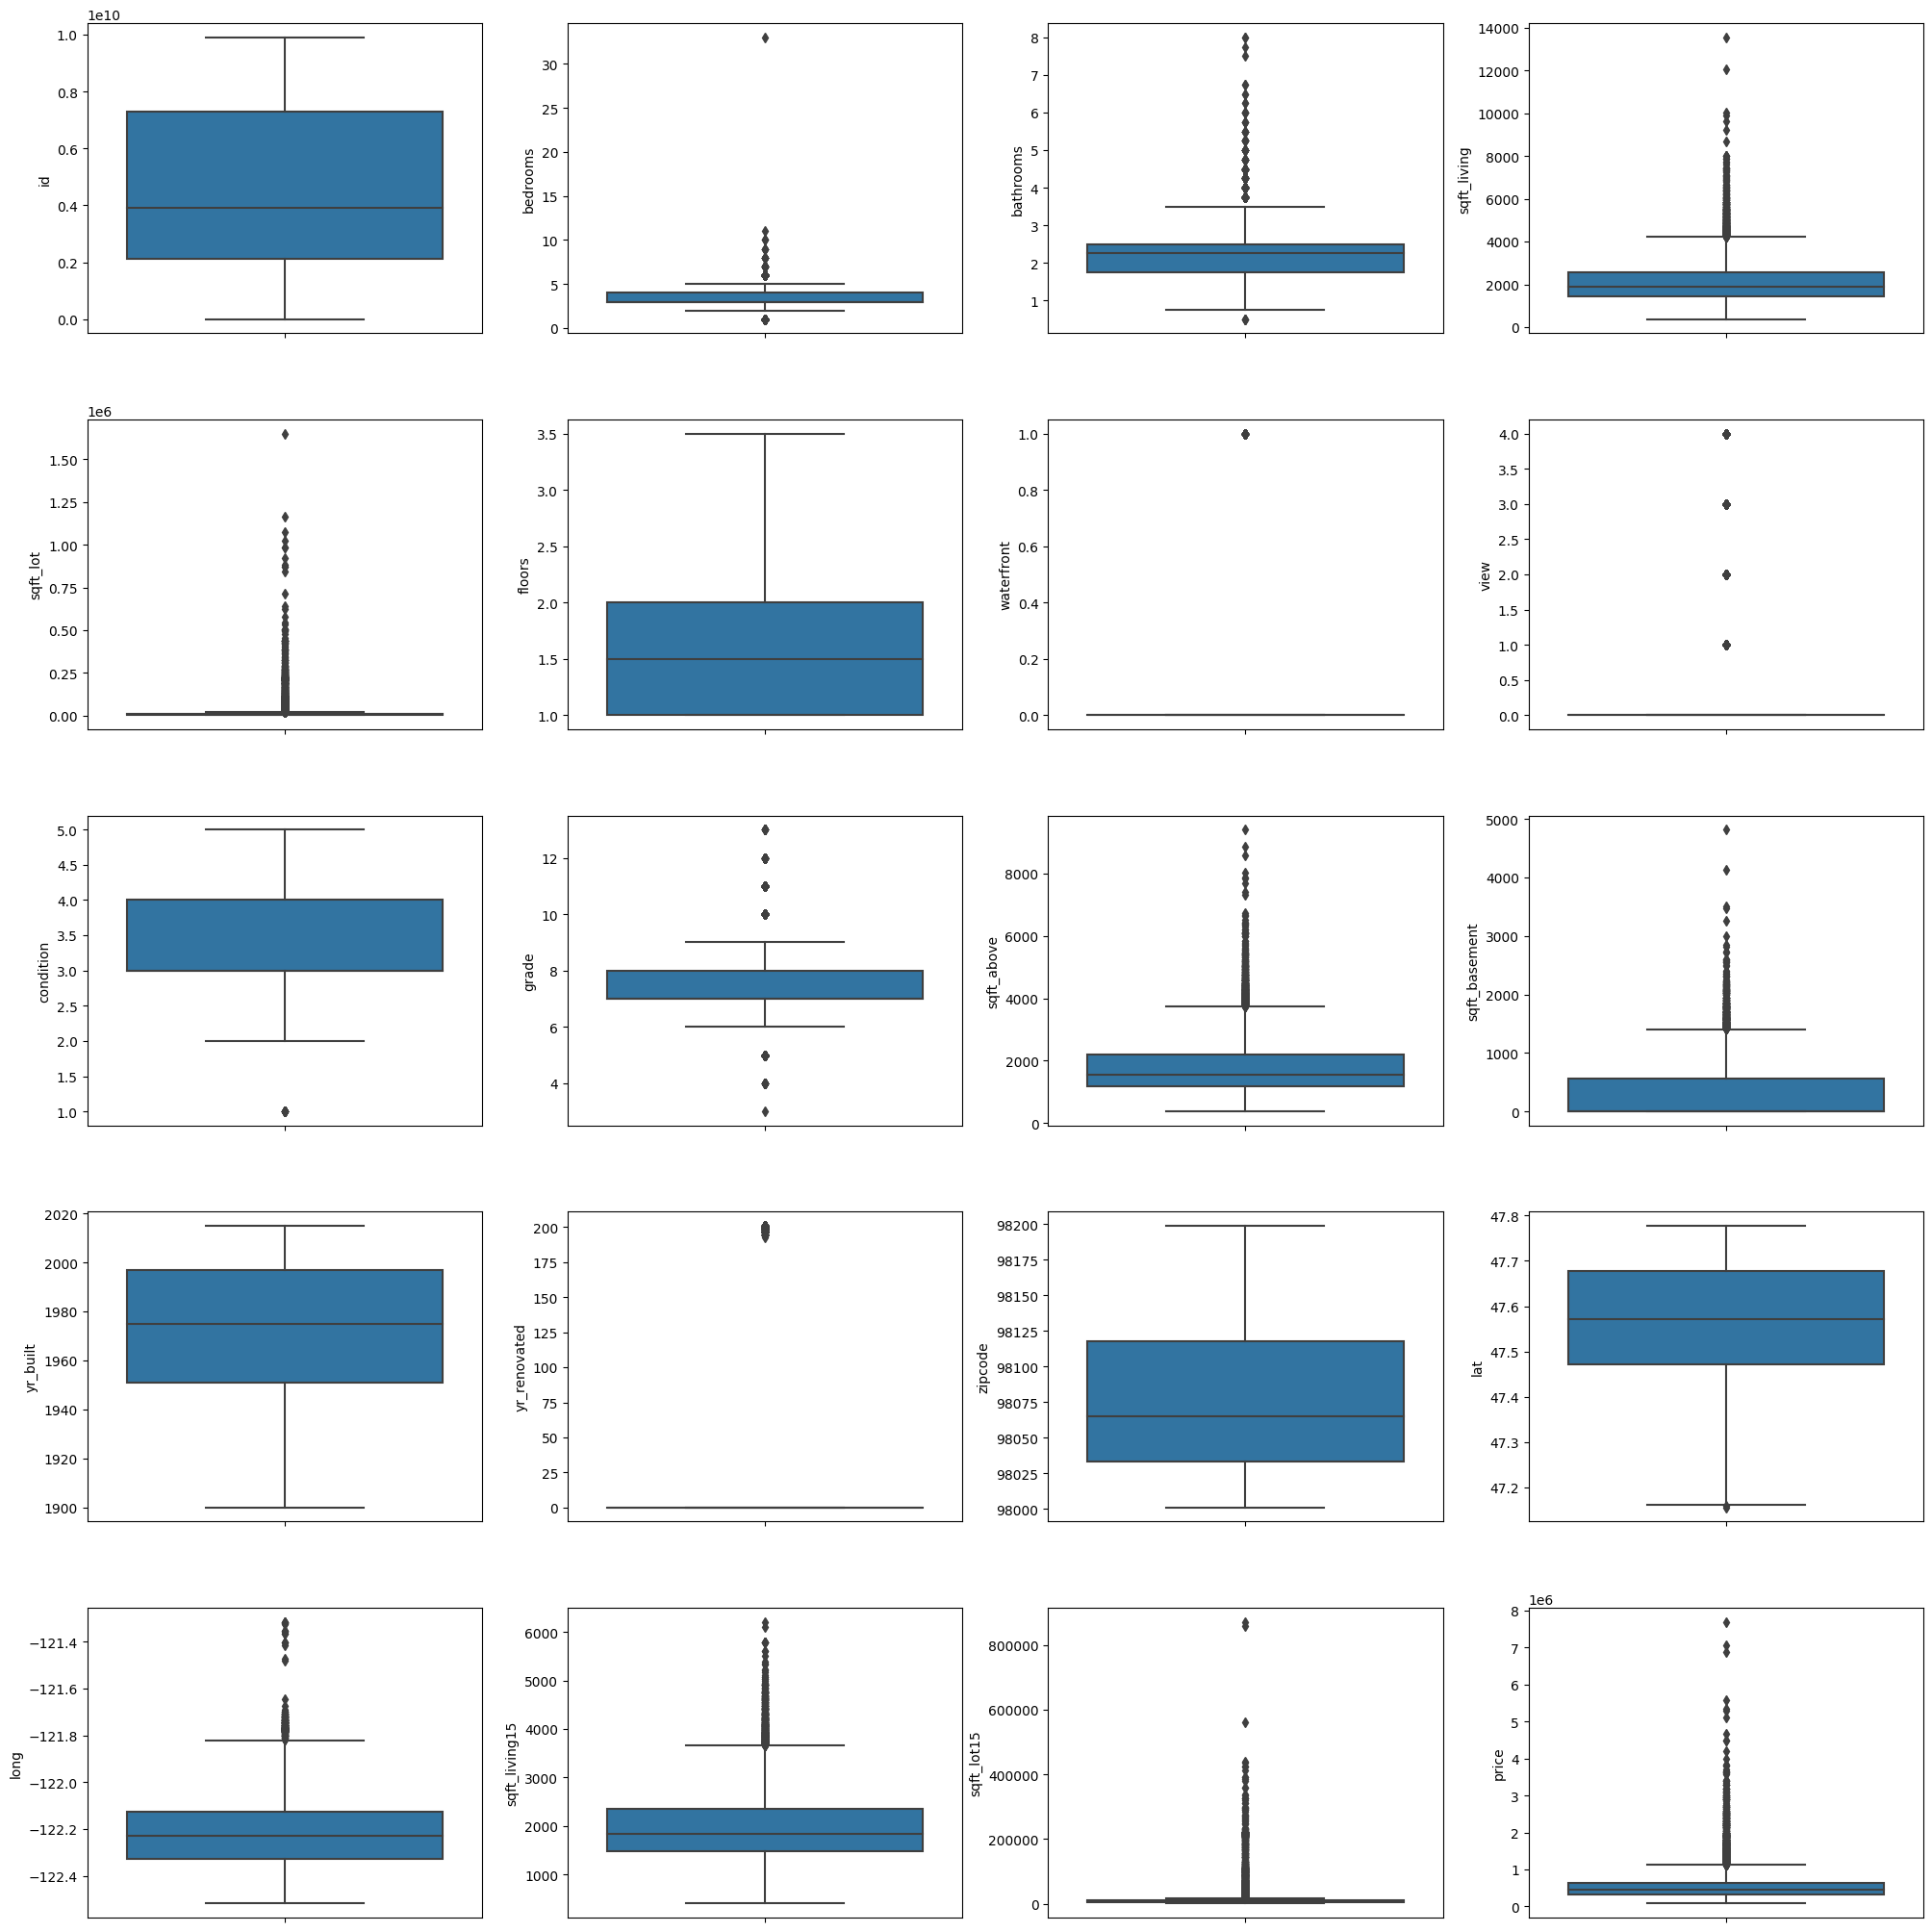

In [15]:
fig, axs = plt.subplots(ncols=4, nrows=5, figsize=(20,20))
index = 0
axs = axs.flatten()
for k,v in df_kch.items():
    if k!="date":
        sns.boxplot(y=k, data=df_kch, ax=axs[index])
        index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Checking the outliers via Google Earth(David's Idea)

max_bedrooms_row = df_kch.loc[df_kch['bedrooms'].idxmax()] # 33 bedrooms are not possible, typo, living area 162m^2 => 0,2m^2 per room?
max_bathrooms_row = df_kch.loc[df_kch['bathrooms'].idxmax()] #  ok
max_sqft_living = df_kch.loc[df_kch['sqft_living'].idxmax()] # ok
max_sqft_lot = df_kch.loc[df_kch['sqft_lot'].idxmax()] # ok
max_view = df_kch.loc[df_kch['view'].idxmax()] # nice
max_basement = df_kch.loc[df_kch['sqft_basement'].idxmax()] # cana? production
min_yr_build = df_kch.loc[df_kch['yr_built'].idxmin()] # the 1900 houses doesnt look old, maybe they didn't change the intial value
last_ten_min_yr_build = df_kch.nsmallest(10, 'yr_built')
max_price_row = df_kch.loc[df_kch['price'].idxmax()] # 
min_grade_row = df_kch.loc[df_kch['grade'].idxmin()] # 

min_grade_row

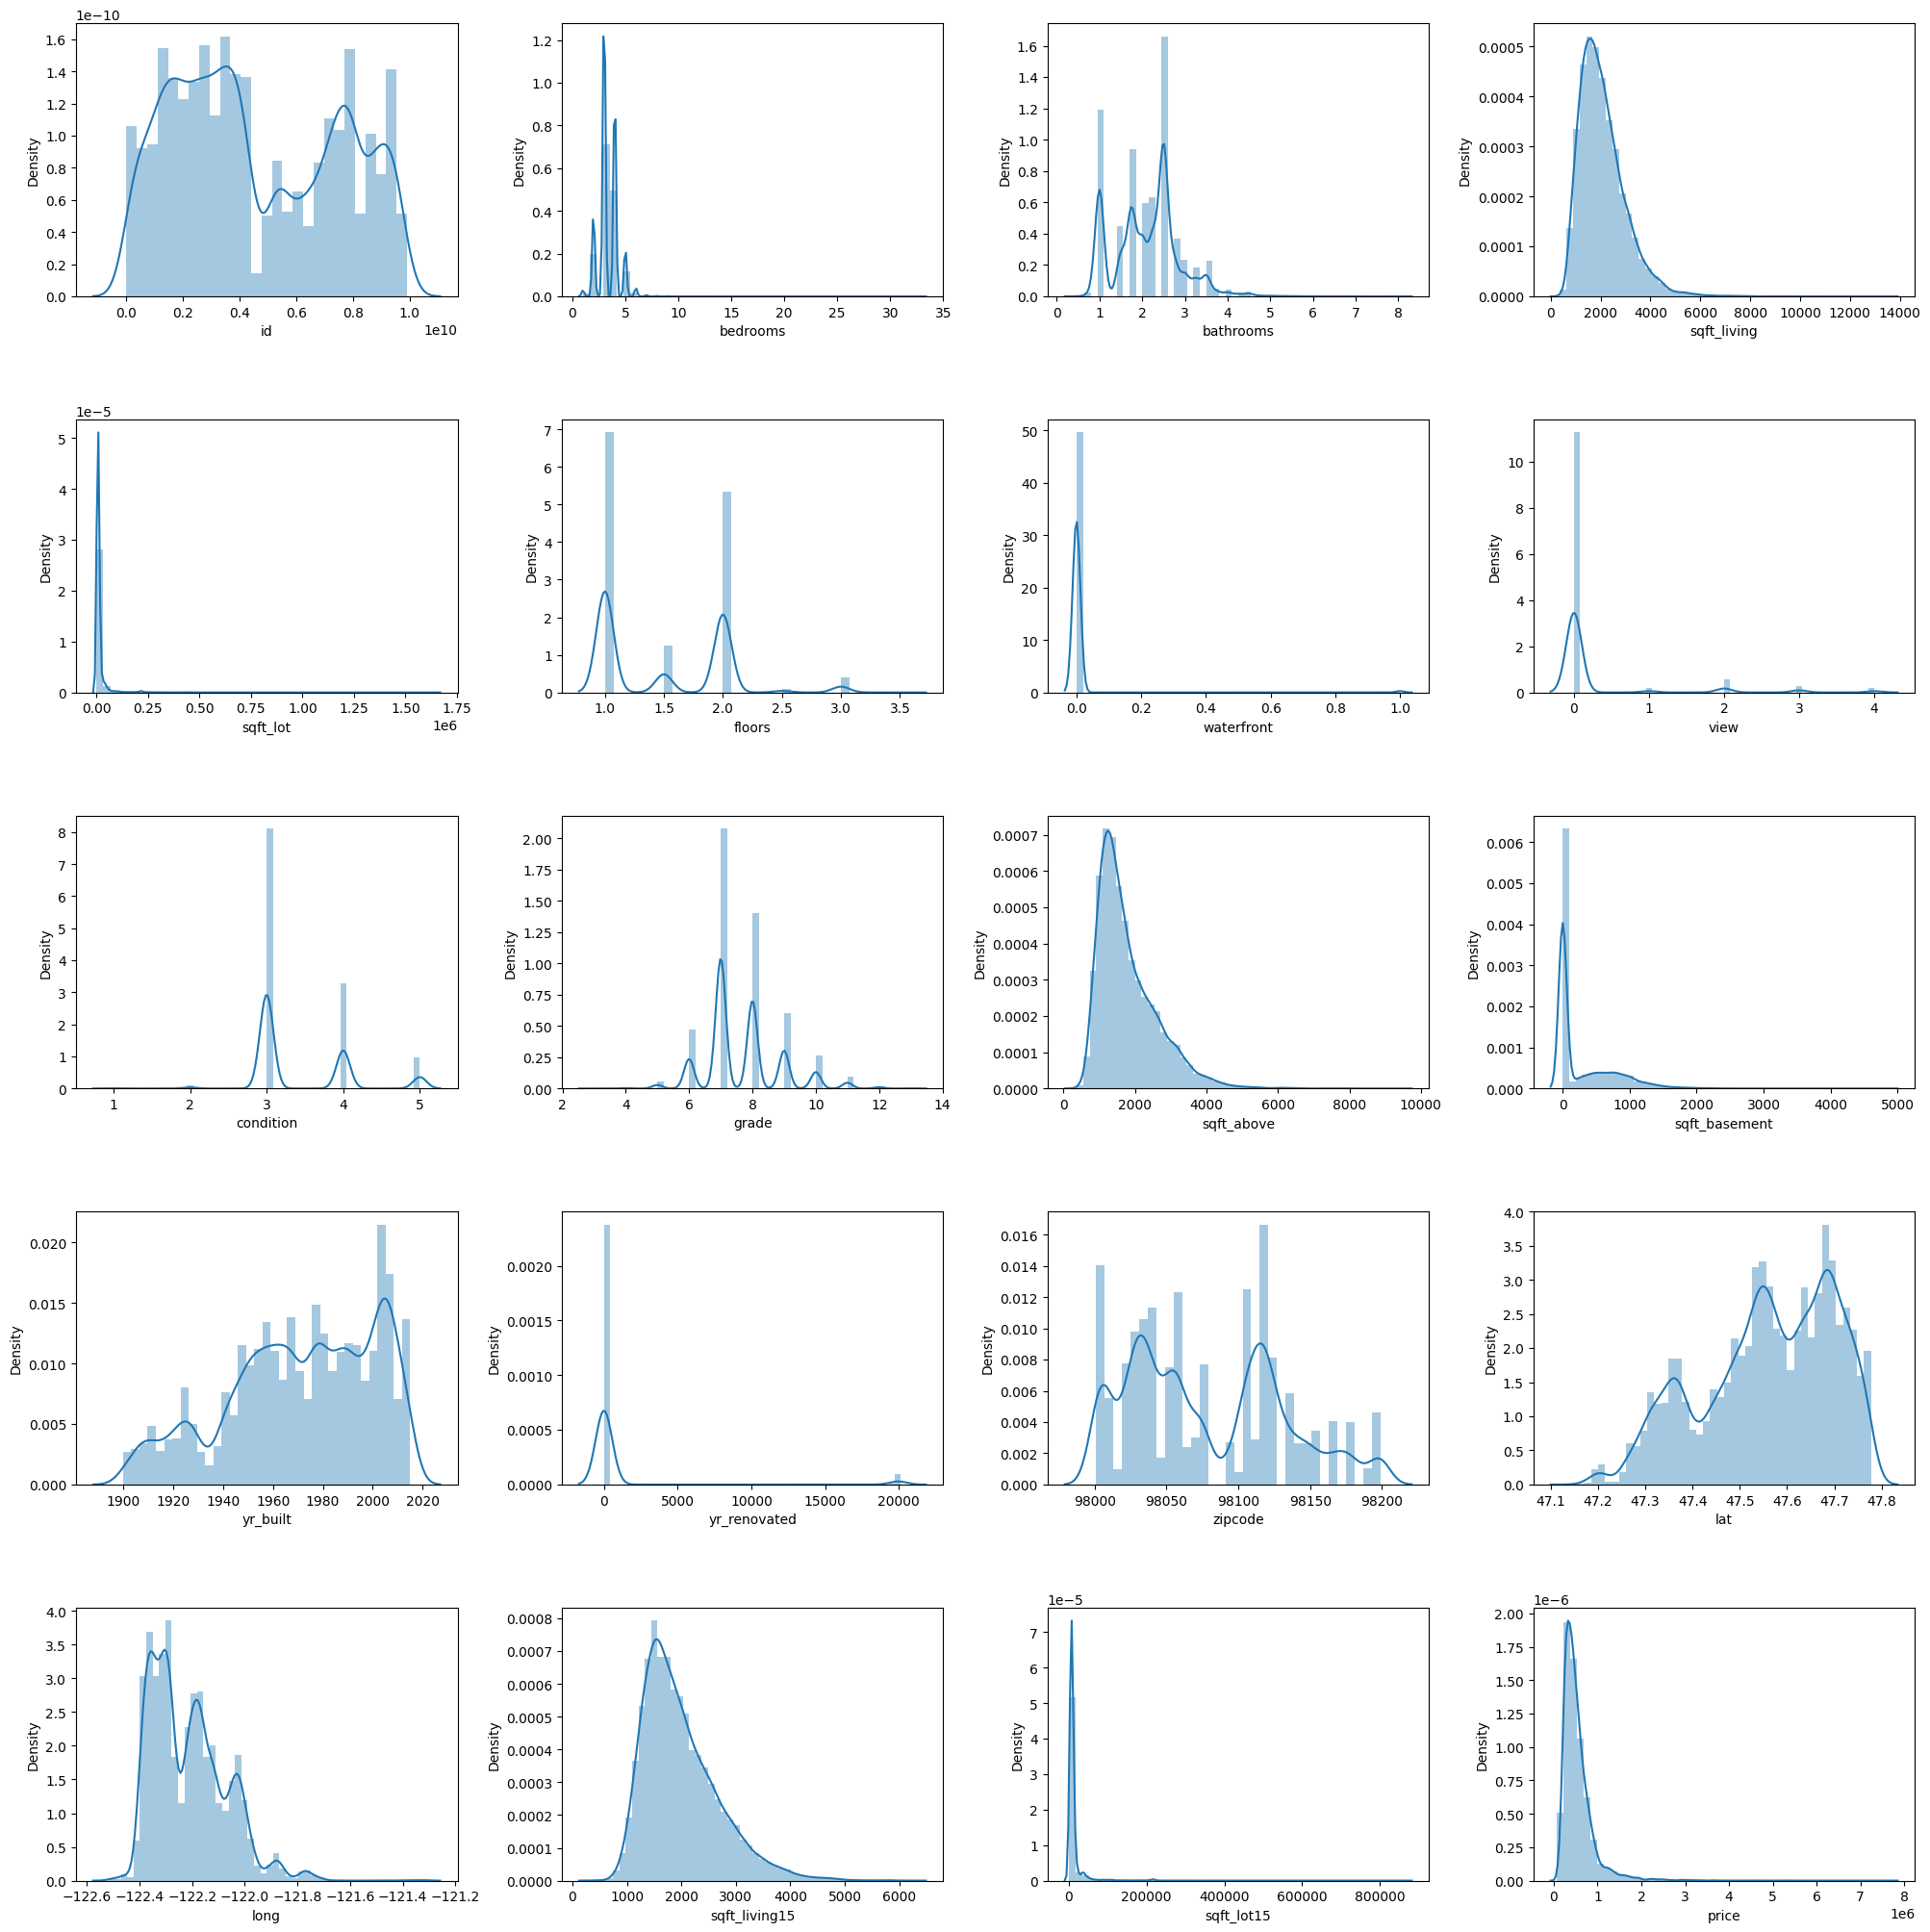

In [6]:
# Distributions - helpful to know where to trim the data
fig, axs = plt.subplots(ncols=4, nrows=5, figsize=(20, 20))
index = 0
axs = axs.flatten()
for k,v in df_kch.items():
    if k!="date":
        sns.distplot(v, ax=axs[index])
        index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Axes: >

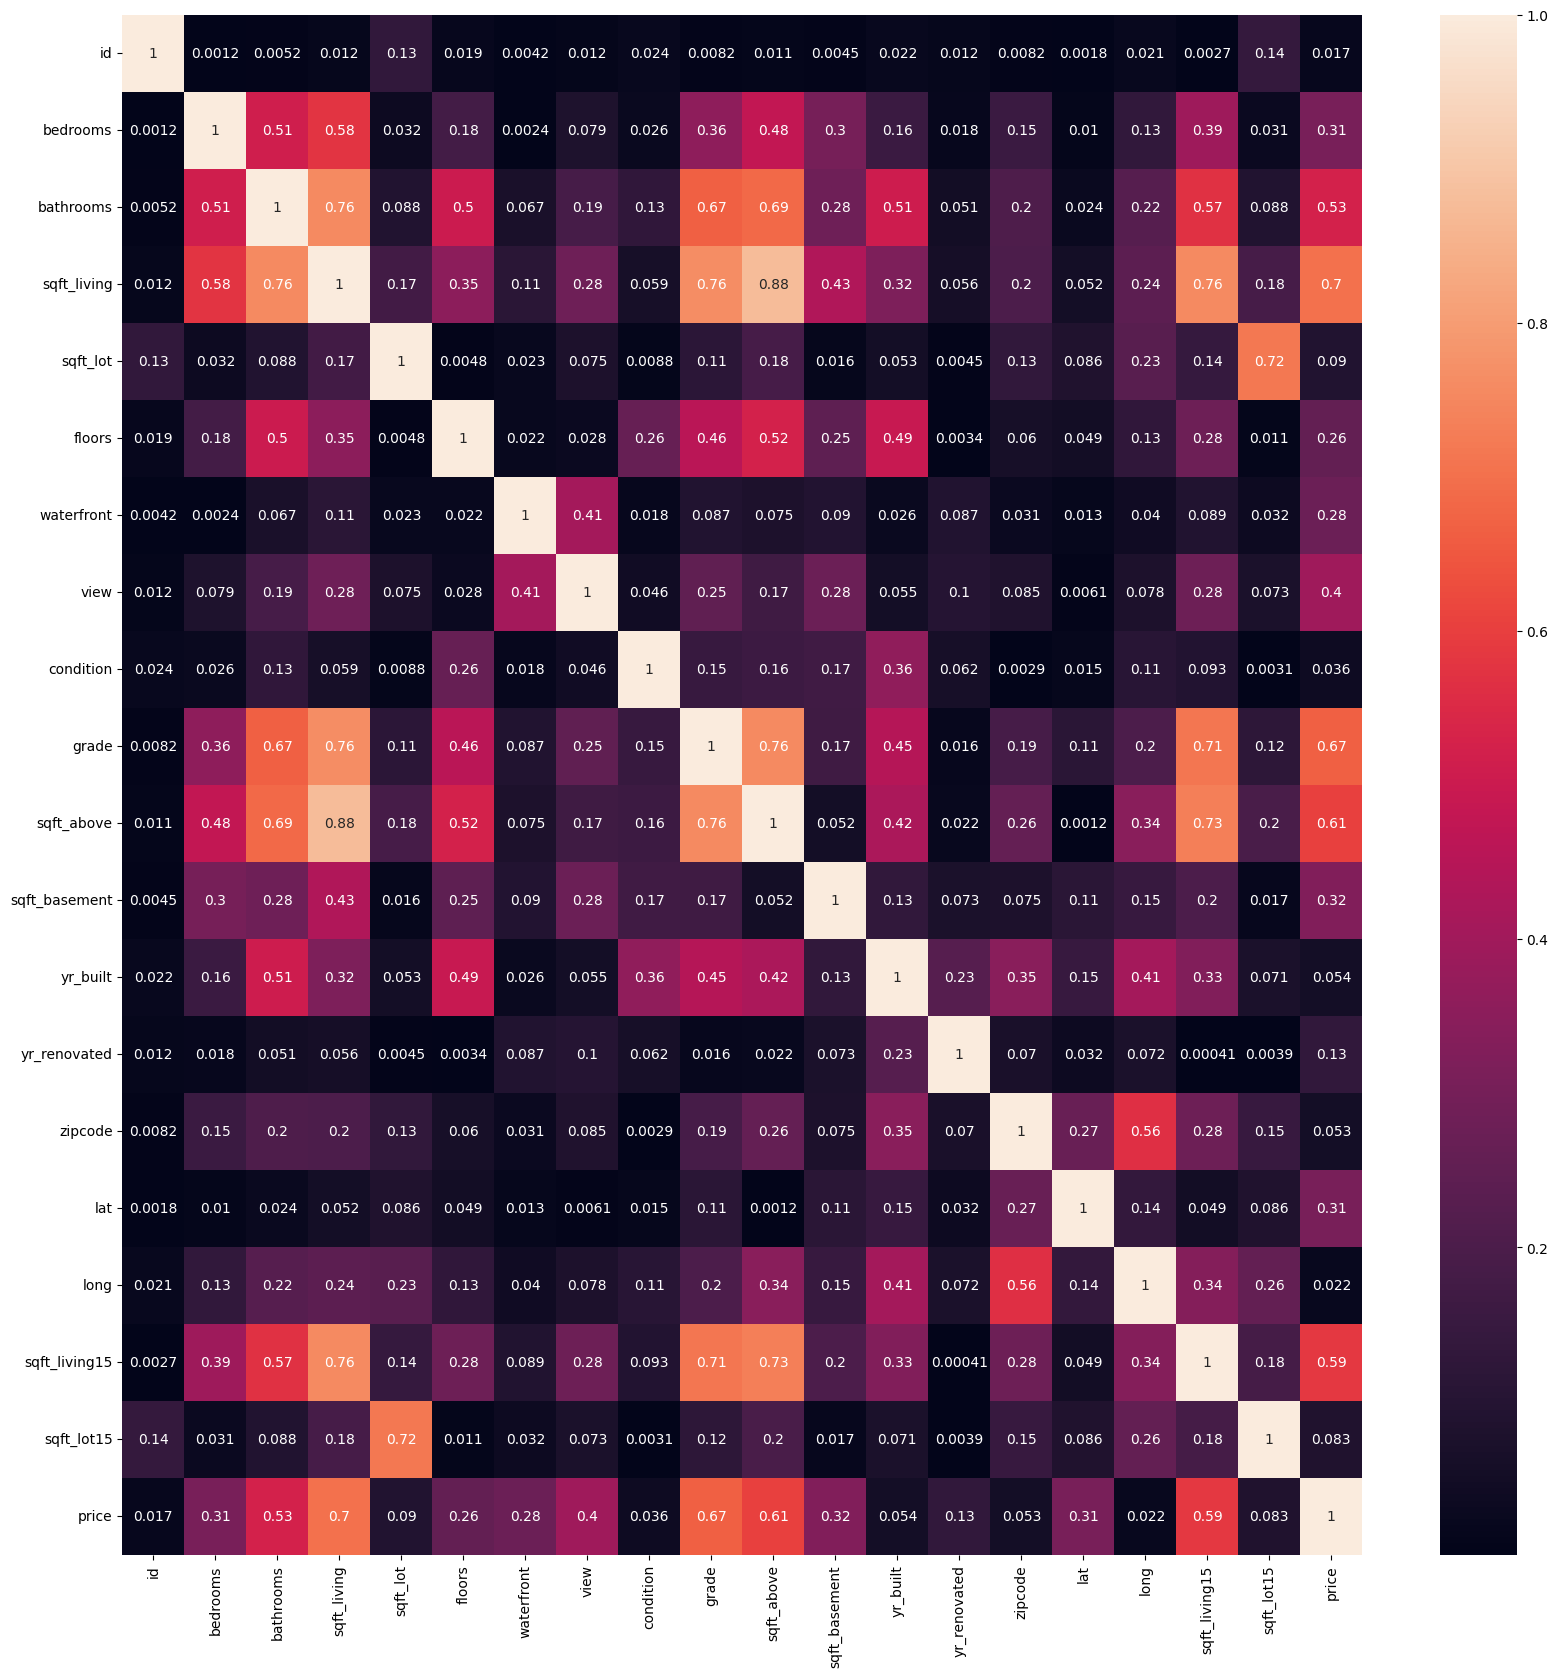

In [7]:
# Corr Matrix  - living space and grade shows high correlation with price - plot again after cleaning
plt.figure(figsize=(20, 20))
sns.heatmap(df_kch.corr().abs(),  annot=True)


Ideas to fill the parameters:
- yr_built:based on price and grade / neighbaring bilding estimate it's year
- yr_renovated: also based on built year and price and location estimate price / based on $/m^2 estimate renovation year

For now:
- remove all suspicious data 
- then try to improve your estimation

In [13]:
# Percentage of outliers
for key, value in df_kch.items():
    # q1 and q3: lower and upper quartiles
    q1 = value.quantile(0.25)
    q3 = value.quantile(0.75)
    # interuartile range
    ir = q3 - q1
    # only outliers
    v_col = value[(value <= q1 - 1.5 * ir) | (value >= q3 + 1.5 * ir)]
    # percentage of outliers, but waterfront,view, sqft_basement,yr_renovated has still missing values
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df_kch)[0]
    print("Column %s outliers = %.2f%%" % (key, perc))

Column id outliers = 0.00%
Column bedrooms outliers = 2.45%
Column bathrooms outliers = 2.60%
Column sqft_living outliers = 2.69%
Column sqft_lot outliers = 11.20%
Column floors outliers = 0.03%
Column waterfront outliers = 88.93%
Column view outliers = 99.71%
Column condition outliers = 0.13%
Column grade outliers = 8.82%
Column sqft_above outliers = 2.86%
Column sqft_basement outliers = 2.42%
Column yr_built outliers = 0.00%
Column yr_renovated outliers = 82.18%
Column zipcode outliers = 0.00%
Column lat outliers = 0.01%
Column long outliers = 1.18%
Column sqft_living15 outliers = 2.51%
Column sqft_lot15 outliers = 10.13%
Column date outliers = 0.00%
Column price outliers = 5.36%


# Customer Profile
Erin Robinson:
- Buyer, 
- Invest in poor neighborhood, 
- buying & selling, 
- costs back + little profit, 
- socially responsible  
- wants to help families
- has a budget 30mil. $ and max 1mil. $ per house
- biggest impact on the community


Steps:
1. Clean / Fill data
    - first iteration removing data
    - second iteration filling data
2. Identifying poor neighborhoods
    - using the house grading system 1-13 of King County - (Choosing 4-7)
    - condition 1-2
    - bedrooms > 3
3. Estimate gains per house

For now removing outliers for:
- bedrooms and bathrooms, there for my client -> poor neighbourhoods
- sqft living, also not important -> social impact
- grade and condition outliers, bc not worth investing -> have to back up this data with price, number of rooms -=> 
- will be filtered during selection bedrooms > 3 -> wants to help families
- 

# 1. Cleaning the data set

Evelation of trimming method for each parameter:
1. id
2. bedrooms 
    - Q1-1.5Interquartile Range - Q3+1.5IQR - Min&Max reasoning: 
        - <3 small families
        - 5> expensive houses? have to check the data - Correlation between bedrooms and price 
3. bathrooms:
    - Min&Max reasoning:
        - <1 you need at least 1 :)
        - >3 rich people -> Look at price and bathroom correlation
4. sqft_living:
    - Min&Max reasoning: Price / Social Impact 
5. sqft_lot
    - same as living
6. floors
    - <=2 reason: price?
7. waterfront
    - leave it
8. view
    - leave it alone :)
9. condition
    - >=3   
10. grade
    - 6-7
11. sqft_basement
12.	yr_built
    - get rid of 1900: because wrong input
13.	yr_renovated
    - get rid of 0, but good estimation is needed
    - because there are lot's houses missing this value
    - and important to calculate possible gains
14.	zipcode	
15. lat
16.	long
17.	sqft_living15
    - Min&Max
18.	sqft_lot15
    - Min&Max
19.	date
20.	price 
    - Min&Max: overbudget / profit margin


# 2. Identifying poor neighborhoods

In [62]:
# Set initial center coordinates and zoom level
initial_center = {"lat": df_kch["lat"].mean(), "lon": df_kch["long"].mean()}
initial_zoom = 10  # Adjust the zoom level as needed

# Define the grid dimensions (number of bins)
num_bins_x = 200
num_bins_y = 200


# Calculate bin edges
x_edges = np.linspace(df_kch["long"].min(), df_kch["long"].max(), num_bins_x + 1)
y_edges = np.linspace(df_kch["lat"].min(), df_kch["lat"].max(), num_bins_y + 1)

# Use numpy.digitize to assign data points to bins
x_bin_indices = np.digitize(df_kch["long"], x_edges) - 1
y_bin_indices = np.digitize(df_kch["lat"], y_edges) - 1

# Aggregate data into rectangular bins
bin_avg_grades = np.zeros((num_bins_y, num_bins_x))

# Calculate average grades for each bin
for i in range(num_bins_y):
    for j in range(num_bins_x):
        mask = (x_bin_indices == j) & (y_bin_indices == i)
        if np.any(mask):
            bin_avg_grades[i, j] = np.mean(df_kch.loc[mask, "grade"])

# Define a color scale with transparency
colorscale = [
    [0, "rgba(0, 0, 0, 0)"],  # Transparent
    [0.2, "rgb(0, 92, 175)"],  # Blue
    [0.4, "rgb(0, 158, 115)"],  # Green
    [0.6, "rgb(254, 190, 60)"],  # Yellow
    [1.0, "rgb(213, 94, 0)"]  # Orange
]
# Create a heatmap-like representation using go.Heatmap
heatmap = go.Heatmap(
    z=bin_avg_grades,
    x=(x_edges[:-1] + x_edges[1:]) / 2,
    y=(y_edges[:-1] + y_edges[1:]) / 2,
    colorscale=colorscale,  # Choose a colorscale
    showscale=True  # Show the color scale legend
)

fig = go.Figure(heatmap)

# fig = px.scatter_geo(df_kch,
#                      lat="lat", lon="long",
#                      text="grade",
#                      color_discrete_sequence=["tomato"],
#                      size_max=5)#,
#                     #  center=initial_center,
#                     #  scope="north america",  # Adjust the scope as needed
#                     #  projection_scale=10)# Adjust the size of the markers


# Update the figure layout to set focus and zoom
fig.update_geos(
    projection_type="albers usa",  # Set the projection type
    center={"lat": initial_center["lat"], "lon": initial_center["lon"]},  # Center on the initial center
    visible=False,  # Hide the default world map
    showland=True,  # Show land outlines
    projection_scale=0
)
fig.update_layout(
    width=1000,  # Set the width of the figure
    height=600  # Set the height of the figure
)

fig.update_layout(
    margin={"r": 0, "t": 0, "l": 0, "b": 0}  # Adjust margins to reduce white space
)

# Show the plot
fig.show()

In [16]:
houses_gdf.geometry[0].x
print(houses_gdf['geometry'].head())

0    POINT (-122.25700 47.51120)
1    POINT (-122.31900 47.72100)
2    POINT (-122.23300 47.73790)
3    POINT (-122.39300 47.52080)
4    POINT (-122.04500 47.61680)
Name: geometry, dtype: geometry


In [17]:
# Load the GeoJSON data using geopandas
# web page: https://gis-kingcounty.opendata.arcgis.com/datasets/kingcounty::metropolitan-king-county-council-kccdst-area/explore?location=47.521009%2C-121.704444%2C8.98
# following contains nice example: https://github.com/altair-viz/altair/issues/588


# importing this allows to access the properties for the plot
# with open("data/Metropolitan_King_County_Council___kccdst_area.geojson") as f:
with open("data/Cities_and_Unincorporated_King_County___city_kc_area.geojson") as f:
    geojson_data = json.load(f)
geoData = alt.Data(values=geojson_data['features'])